## naive_byes_multinomial_bernoulli_demo ##

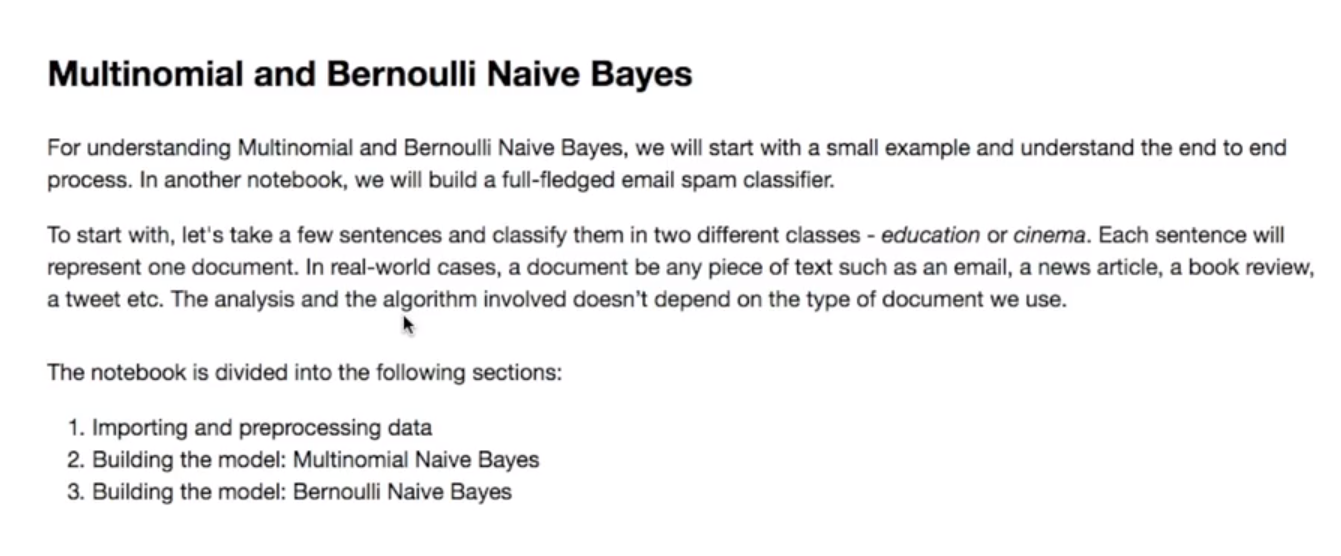

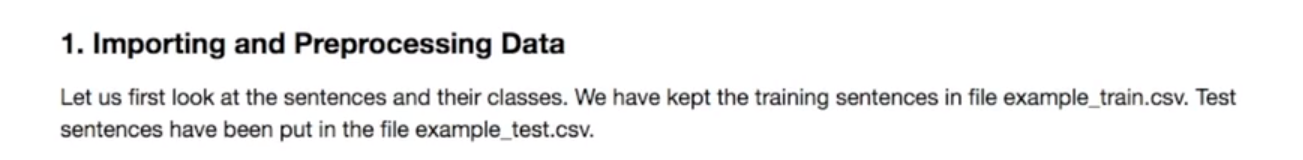